In [1]:
# import python packages 
from meteostat import Point, Stations, Daily
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from IPython.display import display

# import from own modules
import sql as gd
import api

# change options
pd.set_option('display.max_columns', None)
"""
https://github.com/python-pillow/Pillow/issues/5257
"""

'\nhttps://github.com/python-pillow/Pillow/issues/5257\n'

In [38]:
# # save airports informations to db
# gd.save_to_db(airports_df, 'airports_info')

The airports_info table was imported successfully.


In [2]:
us_stations_df = pd.read_csv('data/us_weather_stations.csv')

# from: https://www.faa.gov/airports/airport_safety/airportdata_5010/menu/#datadownloads
airports_df = pd.read_csv('data/NfdcFacilities.csv', sep=';')

# keep needed columns
airports_df = airports_df[['Type', 'LocationID', 'Region', 'City', 'CountyState', 'IcaoIdentifier']] 

# clean data and rename columns
def clean_data(df):
    df['LocationID'] = [string.strip("'") for string in df['LocationID']]
    df.columns = [col.replace(col, col.lower()) for col in df.columns]

clean_data(airports_df)

# change 'locationid' to 'faa' to match the column name in flights_df 
    # and 'icaoidentifier' to 'icao' to match the column name in weather_df
airports_df.rename(columns={'locationid': 'faa', 'icaoidentifier': 'icao'}, inplace=True)

# filter only rows of the 6 airports we are interested in
locations = airports_df[airports_df['faa'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]

# create a list of icao ids of the location to pass to the API
icao_list = locations['icao'].tolist()

In [4]:
# get all weather stations in us and puerto rico
# api.get_weather_stations('PR', 'data/pr_weather_stations.csv')

In [3]:
# find the weather stations near the 6 relevant airports
us_stations_df = pd.read_csv('data/us_weather_stations.csv')

# create dataframe of weather stations in Puerto Rico
pr_stations_df = pd.read_csv('data/pr_weather_stations.csv')

# create a dataframe of all weather stations in US and Puerto Rico
all_weather_stations_df = pd.concat([us_stations_df, pr_stations_df], axis=0)

# filter dataframe on the icao identifiers of the 6 airports
weather_stations_df = all_weather_stations_df[all_weather_stations_df['icao'].isin(icao_list)]
display(weather_stations_df)

,id,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
110,72202,Miami International Airport,US,FL,72202.0,KMIA,25.7833,-80.3167,4.0,America/New_York,1973-01-01,2021-11-04,1948-01-01,2021-11-01,1948-01-01,2021-01-01
266,72408,Philadelphia International Airport,US,PA,72408.0,KPHL,39.8667,-75.2333,6.0,America/New_York,1973-01-01,2021-11-04,1940-07-01,2021-11-01,1940-01-01,2021-01-01
336,72502,Newark Airport,US,NJ,72502.0,KEWR,40.6833,-74.0000,5.0,America/New_York,1973-01-01,2021-11-04,1893-01-01,2021-11-01,1893-01-01,2021-01-01
343,72509,Boston Logan International,US,MA,72509.0,KBOS,42.3667,-71.0167,6.0,America/New_York,1943-11-21,2021-11-04,1936-01-01,2021-11-01,1936-01-01,2021-01-01
532,74486,John F. Kennedy Airport,US,NY,74486.0,KJFK,40.6333,-73.7667,4.0,America/New_York,1973-01-01,2021-11-04,1948-07-17,2021-11-01,1948-01-01,2021-01-01
0,78526,"San Juan / Int., Puerto Rico",PR,NaN,78526.0,TJSJ,18.4333,-66.0000,3.0,America/Puerto_Rico,2005-01-01,2021-11-05,1941-06-17,2021-11-02,1941-01-01,2021-01-01


In [6]:
# create a list of the weather station ids to pass to the api
# weather_stations_list = weather_stations_df['id'].tolist()
# display(weather_stations_list)

In [4]:
# in order to use lat and lon values I am going to create a dictionary with:
    # key = icao
    # values = latitude, longitude
stations_dict = dict()
for i in range(len(weather_stations_df)):
    key = weather_stations_df['icao'].iloc[i]
    stations_dict[key] = weather_stations_df['latitude'].iloc[i], weather_stations_df['longitude'].iloc[i]
    
display(stations_dict)

{'KMIA': (25.7833, -80.3167),
 'KPHL': (39.8667, -75.2333),
 'KEWR': (40.6833, -74.0),
 'KBOS': (42.3667, -71.0167),
 'KJFK': (40.6333, -73.7667),
 'TJSJ': (18.4333, -66.0)}

In [19]:
# start = dt.datetime(2012, 10, 1)
# end = dt.datetime(2012, 12, 31) 
# api.get_weather_daily(stations_dict, start, end, 'data/weather_4quarter.csv')

,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,,
2012-10-01,KMIA,26.7,24.4,28.3,45.0,NaN,NaN,10.8,NaN,1010.4,NaN
2012-10-02,KMIA,26.4,23.3,30.6,17.8,NaN,NaN,8.6,NaN,1014.4,NaN
2012-10-03,KMIA,28.3,24.4,32.2,3.6,NaN,NaN,11.2,NaN,1019.1,NaN
2012-10-04,KMIA,28.6,25.0,32.2,1.8,NaN,83.9,12.2,NaN,1019.8,NaN
2012-10-05,KMIA,29.0,26.7,31.7,0.3,NaN,80.0,12.6,NaN,1016.6,572.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,TJSJ,26.1,23.9,30.6,0.3,0.0,NaN,10.1,NaN,1015.7,NaN
2012-12-28,TJSJ,26.2,23.3,29.4,1.8,0.0,NaN,13.7,NaN,1016.2,NaN
2012-12-29,TJSJ,25.9,23.3,28.9,0.3,0.0,NaN,13.3,NaN,1016.6,NaN


In [18]:
# start = dt.datetime(2011, 10, 1)
# end = dt.datetime(2011, 12, 31) 
# api.get_weather_daily(stations_dict, start, end, 'data/weather_2011_4quarter.csv')

,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,,
2011-10-01,KMIA,28.1,23.9,32.2,0.0,NaN,NaN,8.3,NaN,1010.3,702.0
2011-10-02,KMIA,26.9,23.9,30.6,0.0,NaN,49.3,13.0,NaN,1013.8,689.0
2011-10-03,KMIA,27.6,25.6,30.6,0.0,NaN,68.0,15.1,NaN,1016.9,685.0
2011-10-04,KMIA,27.1,25.6,30.0,0.0,NaN,57.1,15.1,NaN,1018.1,NaN
2011-10-05,KMIA,26.6,23.9,30.0,0.0,NaN,41.0,13.7,NaN,1017.0,681.0
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-27,TJSJ,25.3,23.3,28.9,0.5,0.0,NaN,11.2,NaN,1018.4,NaN
2011-12-28,TJSJ,24.8,22.2,28.3,3.0,0.0,NaN,12.2,NaN,1018.3,NaN
2011-12-29,TJSJ,25.5,22.8,28.9,0.0,0.0,NaN,10.8,NaN,1018.2,NaN


In [5]:
# Code	Meaning
# TEMP	Air Temperature
# TAVG	Average Temperature
# TMIN	Minimum Temperature
# TMAX	Maximum Temperature
# DWPT	Dew Point
# PRCP	Total Precipitation
# WDIR	Wind Direction
# WSPD	Average Wind Speed
# WPGT	Wind Peak Gust
# RHUM	Relative Humidity
# PRES	Sea-Level Air Pressure
# SNOW	Snow Depth
# TSUN	Total Sunshine Duration
# COCO	Weather Condition Code
# #

In [5]:
# create a dataframe with the weather data
weather_df_2011 = pd.read_csv('data/weather_2011_4quarter.csv')
weather_df_2012 = pd.read_csv('data/weather_2012_4quarter.csv')

# change time column to datatime data type
weather_df_2011['time'] = pd.to_datetime(weather_df_2011['time'])
weather_df_2012['time'] = pd.to_datetime(weather_df_2012['time'])

# drop the empty column wpgt
weather_df_2011.drop('wpgt', axis=1, inplace=True)
weather_df_2012.drop('wpgt', axis=1, inplace=True)

# create weather_df to upload the data of both years in one file
weather_df = pd.concat([weather_df_2011, weather_df_2012], axis=0)

display(weather_df_2011.head(2))
display(weather_df_2012.head(2))

,time,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,tsun
0,2011-10-01,KMIA,28.1,23.9,32.2,0.0,NaN,NaN,8.3,1010.3,702.0
1,2011-10-02,KMIA,26.9,23.9,30.6,0.0,NaN,49.3,13.0,1013.8,689.0


,time,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,tsun
0,2012-10-01,KMIA,26.7,24.4,28.3,45.0,NaN,NaN,10.8,1010.4,NaN
1,2012-10-02,KMIA,26.4,23.3,30.6,17.8,NaN,NaN,8.6,1014.4,NaN


In [8]:
# add a new column city
city_dict = {
    'TJSJ': 'PR - San Juan',
    'KMIA': 'US - Miami',
    'KPHL': 'US - Philadelphia',
    'KJFK': 'US - New York',
    'KEWR': 'US - New Jersy',
    'KBOS': 'US - Boston'}

weather_df['city'] = weather_df['icao'].map(city_dict)

# add an additional column with the 'icaoidentifier' to the weather df
weather_df = weather_df.merge(locations[['icao', 'faa', ]], how='left', on='icao')

# move 'faa' column to the first 2 position
weather_df = weather_df[['time', 'icao', 'faa', 'city',  'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir',
       'wspd', 'pres', 'tsun']]

In [9]:
sandy_dict = {
    'TJSJ': dt.datetime(2012,10,25),
    'KMIA': dt.datetime(2012,10,26),
    'KPHL': dt.datetime(2012,10,30),
    'KJFK': dt.datetime(2012,10,30),
    'KEWR': dt.datetime(2012,10,30),
    'KBOS': dt.datetime(2012,10,31)}

weather_df_2012['sandy_day'] = weather_df_2012['icao'].map(sandy_dict) 

In [7]:
# save weather data to database
# table_name = 'group4_weather_data'
# gd.save_to_db(weather_df, table_name)

In [18]:
# get the flights data from database
#flights_df = gd.query_database("SELECT * FROM public.group4_flights_data")

flights_df = pd.read_sql_query("SELECT * FROM public.group4_flights_data", gd.get_conn())
display(type(flights_df))
display(flights_df.head(5))
display(flights_df.info())

pandas.core.frame.DataFrame

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,dest,air_time,distance,cancelled,diverted
0,2011-10-09,721.0,725,-4.0,821.0,820,1.0,AA,N5CEAA,404,MIA,MCO,34.0,192.0,0,0
1,2011-10-10,724.0,725,-1.0,820.0,820,0.0,AA,N5DXAA,404,MIA,MCO,36.0,192.0,0,0
2,2011-10-11,719.0,725,-6.0,818.0,820,-2.0,AA,N612AA,404,MIA,MCO,37.0,192.0,0,0
3,2011-10-12,722.0,725,-3.0,820.0,820,0.0,AA,N5CWAA,404,MIA,MCO,35.0,192.0,0,0
4,2011-10-13,721.0,725,-4.0,820.0,820,0.0,AA,N5FTAA,404,MIA,MCO,33.0,192.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389158 entries, 0 to 389157
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   flight_date     389158 non-null  datetime64[ns]
 1   dep_time        379506 non-null  float64       
 2   sched_dep_time  389158 non-null  int64         
 3   dep_delay       379506 non-null  float64       
 4   arr_time        379210 non-null  float64       
 5   sched_arr_time  389158 non-null  int64         
 6   arr_delay       378602 non-null  float64       
 7   airline         389158 non-null  object        
 8   tail_number     386021 non-null  object        
 9   flight_number   389158 non-null  int64         
 10  origin          389158 non-null  object        
 11  dest            389158 non-null  object        
 12  air_time        378602 non-null  float64       
 13  distance        389158 non-null  float64       
 14  cancelled       389158 non-null  int

None

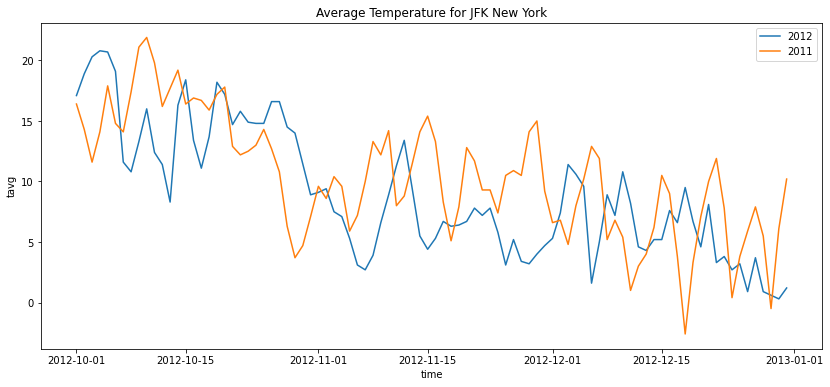

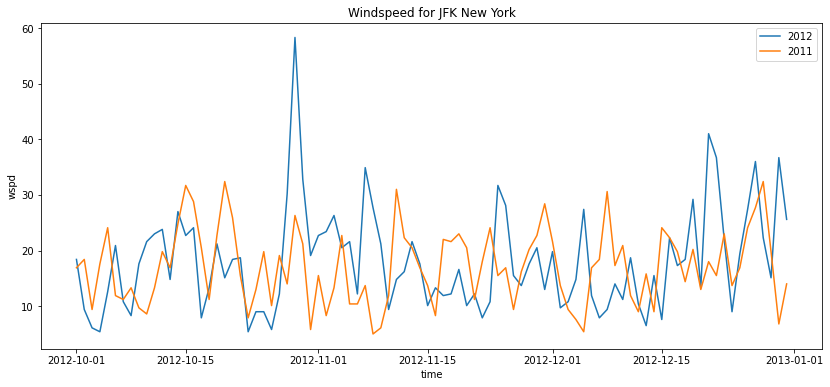

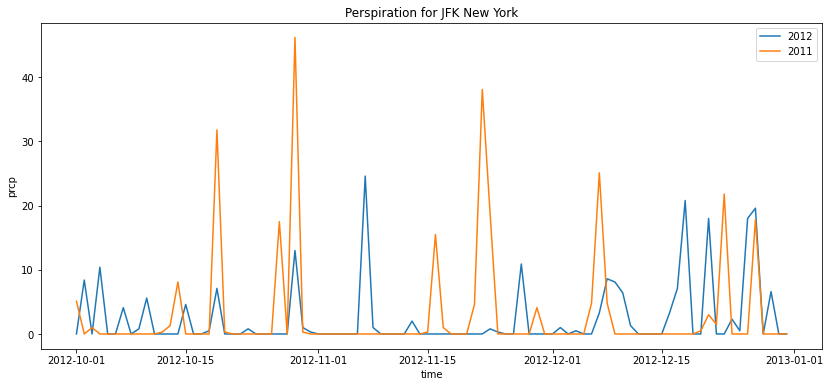

In [ ]:
col_list = ['tavg', 'wspd', 'prcp']
col_names_list = ['Average Temperature', 'Windspeed', 'Perspiration']

for i, col in enumerate(col_list):
    fig, ax = plt.subplots(figsize=(14,6))

    x = weather_df_2012['time'][weather_df_2011['icao'] == 'KJFK']
    y1 = weather_df_2011[col]
    y2 = weather_df_2012[col]

    sns.lineplot(x=x, y=y2, ci=None, ax=ax, label='2012')
    sns.lineplot(x=x, y=y1, ci=None, ax=ax, label='2011')
    #ax.set_xticklabels(weather_df_2012['sandy_day'])
    ax.set_title(col_names_list[i] + ' for JFK New York')
    plt.show()

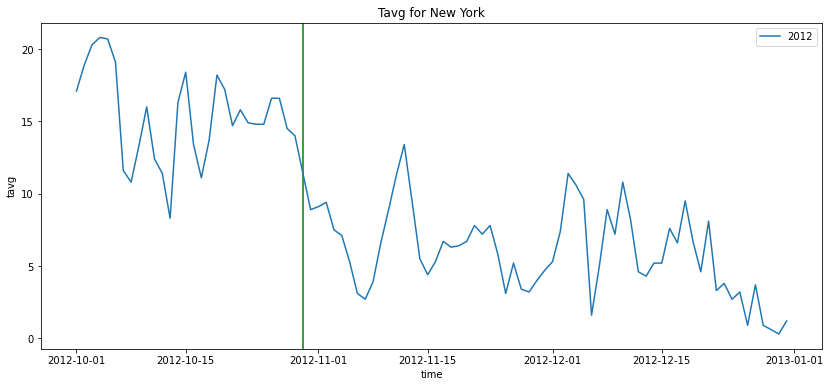

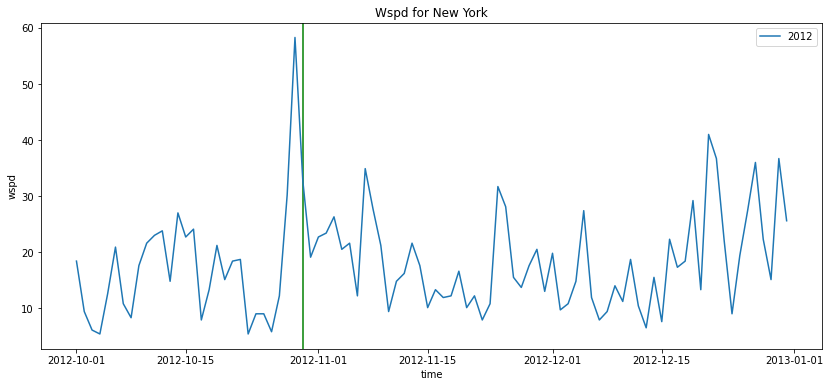

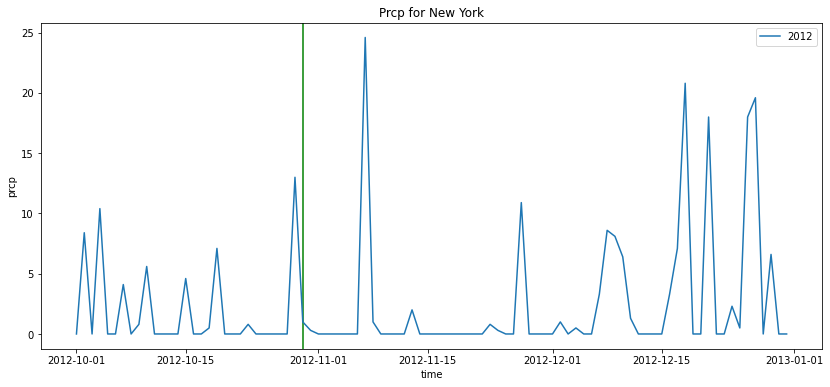

In [12]:
col_list = ['tavg', 'wspd', 'prcp']
ordered_airports = ['TJSJ', 'KMIA', 'KPHL', 'KJFK', 'KEWR', 'KBOS']

for col in col_list:
    fig, ax = plt.subplots(figsize=(14,6))

    x = weather_df_2012['time'][weather_df_2012['icao'] == 'KJFK']
    y = weather_df_2012[weather_df_2012['icao'] == 'KJFK'][col]
    # y2 = weather_df_2012[weather_df_2012['icao'] == 'KJFK']['sandy_day']
    # y2 = 
    ax.axvline(dt.datetime(2012,10,30), color='green')
    sns.lineplot(x=x, y=y, ci=None, ax=ax, label='2012')

    
    ax.set_title(col.capitalize() + ' for New York')
    #ax.legend()
    plt.show()

In [19]:
display(stations_dict)
# create a list of airports ordered by the course of the hurricane
ordered_airports = ['TJSJ', 'KMIA', 'KPHL', 'KJFK', 'KEWR', 'KBOS']

{'KMIA': (25.7833, -80.3167),
 'KPHL': (39.8667, -75.2333),
 'KEWR': (40.6833, -74.0),
 'KBOS': (42.3667, -71.0167),
 'KJFK': (40.6333, -73.7667),
 'TJSJ': (18.4333, -66.0)}

In [111]:
weather_df['period'] = weather_df['time'].dt.to_period('d')
weather_df[weather_df['period'].dt.month == 10].iloc[0,0]

Timestamp('2011-10-01 00:00:00')

In [42]:
flights_df.groupby('dest').count().sort_values(by='flight_number', ascending=False).head(20)

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,origin,air_time,distance,cancelled,diverted
dest,,,,,,,,,,,,,,,
EWR,60088,57628,60088,57628,57563,60088,57487,60088,59206,60088,60088,57487,60088,60088,60088
BOS,50920,49873,50920,49873,49854,50920,49828,50920,50462,50920,50920,49828,50920,50920,50920
JFK,46695,45494,46695,45494,45439,46695,45327,46695,46510,46695,46695,45327,46695,46695,46695
MIA,38926,38521,38926,38521,38510,38926,38472,38926,38803,38926,38926,38472,38926,38926,38926
SJU,11429,11329,11429,11329,11325,11429,11309,11429,11404,11429,11429,11309,11429,11429,11429
MCO,10277,10134,10277,10134,10132,10277,10121,10277,10229,10277,10277,10121,10277,10277,10277
ATL,10008,9884,10008,9884,9881,10008,9875,10008,10003,10008,10008,9875,10008,10008,10008
LAX,9721,9523,9721,9523,9520,9721,9490,9721,9627,9721,9721,9490,9721,9721,9721
ORD,9136,8894,9136,8894,8893,9136,8881,9136,9007,9136,9136,8881,9136,9136,9136


In [56]:
flights_amount_all = flights_df.groupby('dest').count()['flight_number'].sum()
display(flights_amount_all)

airports_6_df = flights_df[flights_df['dest'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]
flights_amount_6 = airports_6_df.groupby('dest').count()['flight_number'].sum()
display(flights_amount_6)
percentage_all_flights = round((flights_amount_6/flights_amount_all)*100, 2)

display(f'The 6 selected airports are destinations of {percentage_all_flights} % of all US flights')

diverted_all = flights_df[flights_df['diverted'] == 1]['diverted'].count()
display(diverted_all)

airports_6_df = flights_df[flights_df['dest'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]
diverted_6 = airports_6_df[airports_6_df['diverted'] == 1]['diverted'].count()
display(diverted_6)

percentage_diverted = round((diverted_6/diverted_all)*100, 2)
percentage_diverted

389158

212705

'The 6 selected airports are destinations of 54.66 % of all US flights'

729

338

46.36

In [65]:
# flights_df_december = flights_df[flights_df['flight_date'] >= dt.datetime(2012, 12, 1)]
flights_df_december = flights_df[(flights_df['flight_date'] < dt.datetime(2011, 11, 1)) & (flights_df['flight_date'] >= dt.datetime(2011, 10, 1))]

flights_amount_all = flights_df_december.groupby('dest').count()['flight_number'].sum()
display(flights_amount_all)

airports_6_df = flights_df_december[flights_df_december['dest'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]
flights_amount_6 = airports_6_df.groupby('dest').count()['flight_number'].sum()
display(flights_amount_6)
percentage_all_flights = round((flights_amount_6/flights_amount_all)*100, 2)

display(f'The 6 selected airports are destinations of {percentage_all_flights} % of all US flights')

diverted_all = flights_df_december[flights_df_december['diverted'] == 1]['diverted'].count()

airports_6_df = flights_df_december[flights_df_december['dest'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]
diverted_6 = airports_6_df[airports_6_df['diverted'] == 1]['diverted'].count()

percentage_diverted = round((diverted_6/diverted_all)*100, 2)
percentage_diverted

63911

34968

'The 6 selected airports are destinations of 54.71 % of all US flights'

61.39

In [62]:
flights_df_october = flights_df[(flights_df['flight_date'] < dt.datetime(2012, 11, 1)) & (flights_df['flight_date'] >= dt.datetime(2012, 10, 1))]

flights_amount_all = flights_df_october.groupby('dest').count()['flight_number'].sum()
display(flights_amount_all)

airports_6_df = flights_df_october[flights_df_october['dest'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]
flights_amount_6 = airports_6_df.groupby('dest').count()['flight_number'].sum()
display(flights_amount_6)
percentage_all_flights = round((flights_amount_6/flights_amount_all)*100, 2)

display(f'The 6 selected airports are destinations of {percentage_all_flights} % of all US flights')

diverted_all = flights_df_october[flights_df_october['diverted'] == 1]['diverted'].count()

airports_6_df = flights_df_october[flights_df_october['dest'].isin(['BOS', 'EWR', 'JFK', 'MIA', 'PHL', 'SJU'])]
diverted_6 = airports_6_df[airports_6_df['diverted'] == 1]['diverted'].count()

percentage_diverted = round((diverted_6/diverted_all)*100, 2)
percentage_diverted

66788

36366

'The 6 selected airports are destinations of 54.45 % of all US flights'

53.54

In [73]:
display(flights_df_december['flight_date'].dt.month.value_counts())
display(flights_df_december['flight_date'].dt.year.value_counts())

display(flights_df_october['flight_date'].dt.month.value_counts())
display(flights_df_october['flight_date'].dt.year.value_counts())

10    63911
Name: flight_date, dtype: int64

2011    63911
Name: flight_date, dtype: int64

10    66788
Name: flight_date, dtype: int64

2012    66788
Name: flight_date, dtype: int64